In [46]:
from segment_everything.prompt_generator import YoloDetector
from pathlib import Path
tnia_images_path = Path(r"D:\images")
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_05_01_cellpose_ladybug')

In [49]:
yolo_detector1 = YoloDetector( str(parent_path / r"YOLO-training-2\100-epochs-ladybug\weights\best.pt"), "RegularYOLO", 'cuda')

In [50]:
from skimage.io import imread

img = imread(parent_path / r"522_img_crop.png")    

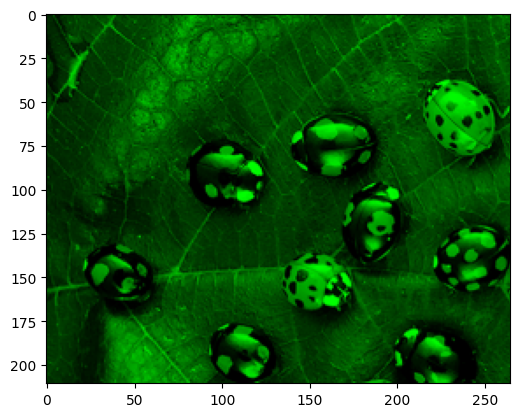

In [51]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [56]:
results = yolo_detector1.get_results(img, conf=0.3, imgsz=512)


0: 416x512 39 ladybugs, 97 spots, 48.9ms
Speed: 4.0ms preprocess, 48.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 512)


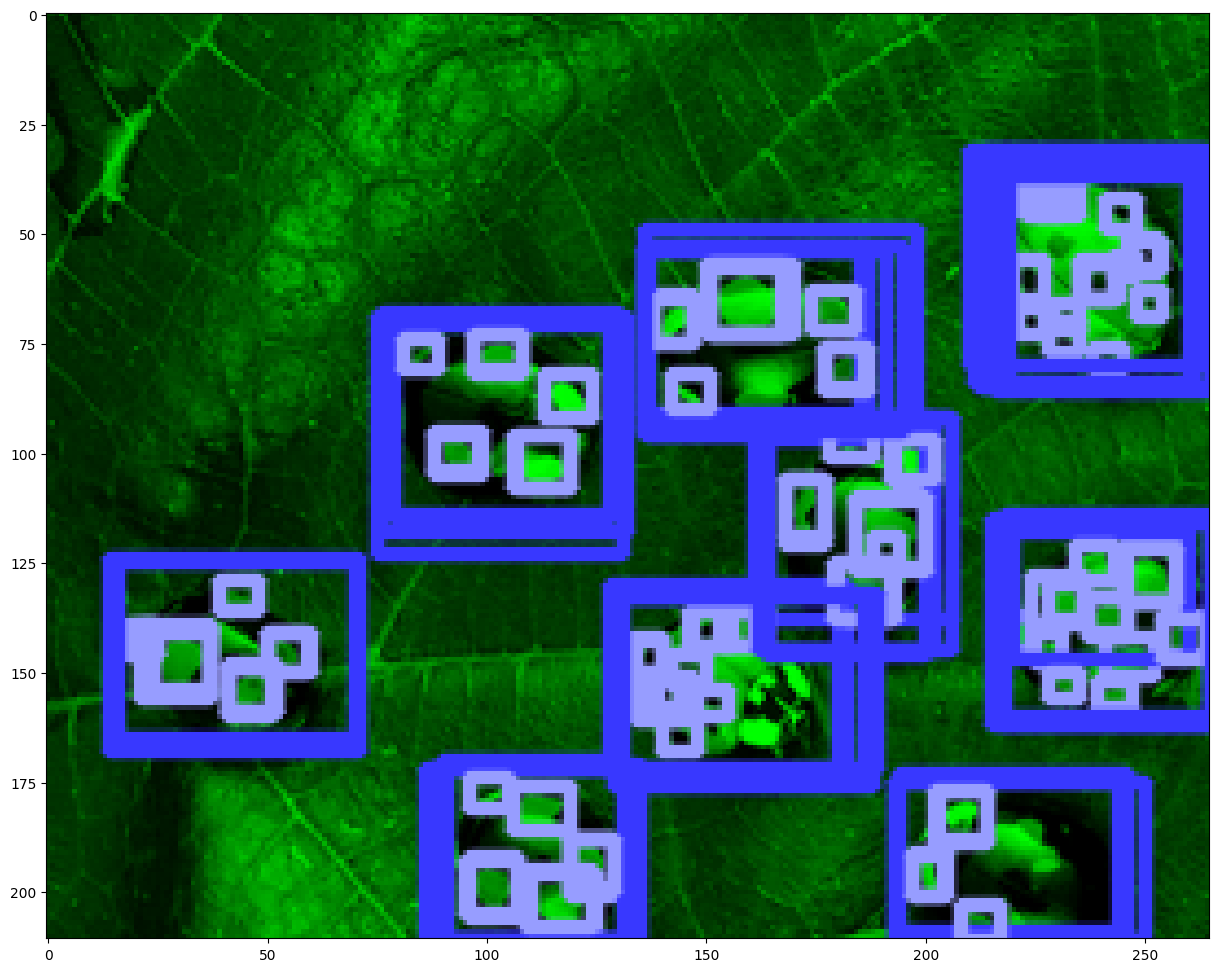

In [57]:
test = results[0].plot(labels=False)
plt.figure(figsize=(15,15))
plt.imshow(test)

In [58]:
#model_8m = YOLO('yolov8m.pt')  # Transfer the weights from a pretrained model (recommended for training)
yolo_detector_8m = YoloDetector( 'yolov8m.pt', "RegularYOLO", 'cuda')

In [59]:
results = model_8m.predict(img, conf=0.1)



0: 512x640 6 sports balls, 4 baseball gloves, 119.5ms
Speed: 4.2ms preprocess, 119.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 640)


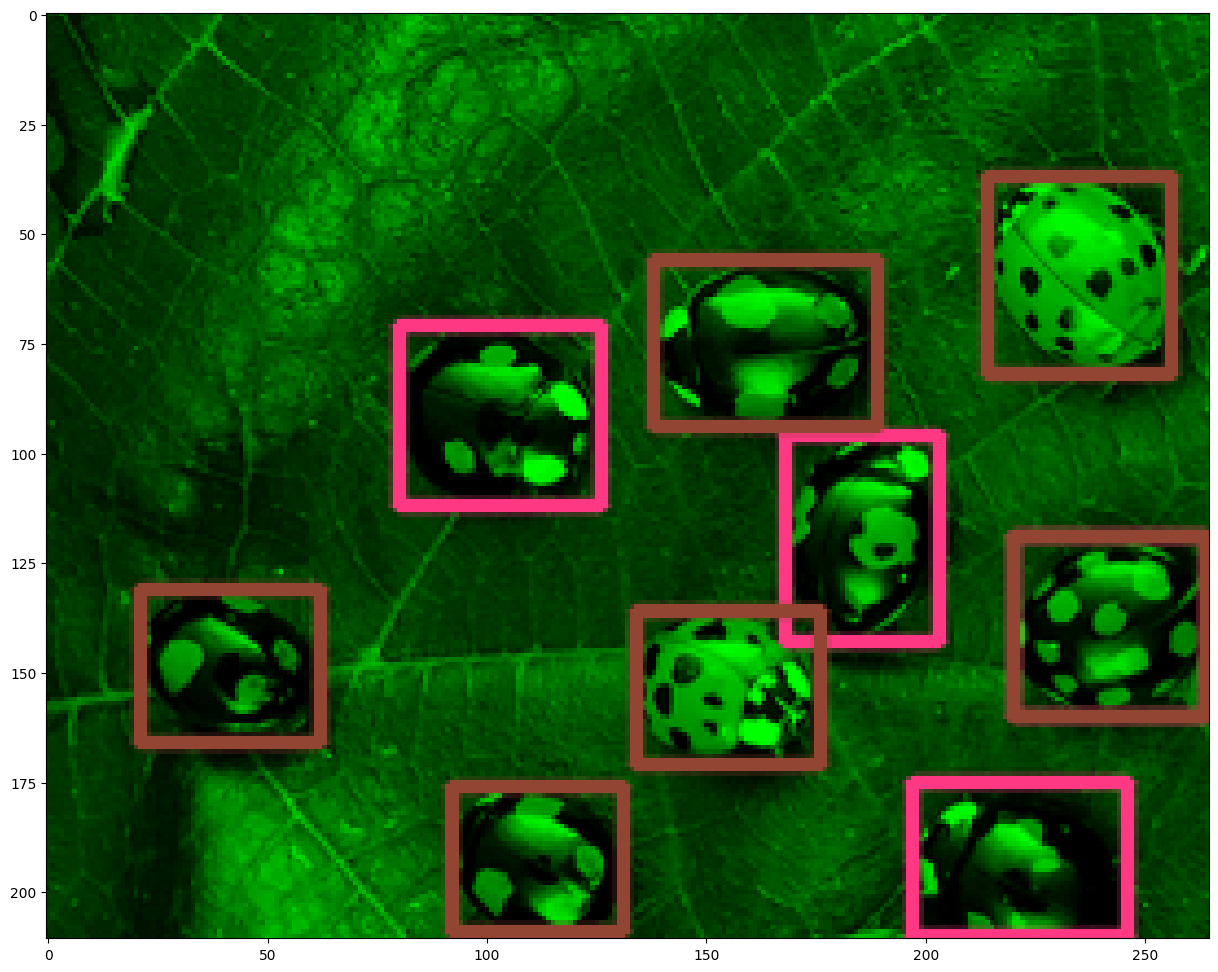

In [60]:
test = results[0].plot(labels=False)
plt.figure(figsize=(15,15))
plt.imshow(test)